<div>
    <h3>Quick report of life and death</h3>
    <h4>Source</h4>
    <div>git pull https://github.com/CSSEGISandData/COVID-19.git</div>
    <div>Country comparison of sum and rolling increase of reported cases and death.</div>
</div>

In [1]:
import pandas as pd
import datetime as dtt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
def infect(source, *arg):
    df = pd.read_csv(source)
    df.drop(['Lat','Long'], axis = 1, inplace = True)
    
    country = pd.DataFrame()
    for i in arg:
        c = df.loc[df['Country/Region'] == i]
        country = pd.concat([country,c])
        
    country = country.groupby('Country/Region').sum()
    country = country.T
    for i in arg:
        country[i+'Daily'] = country[[i]].diff(axis = 0, periods = 1)
    country.columns.name = 'Country'
    country.index.name = 'Date'
    return country

def plot():
    col1 = c =[i for i in sick.columns if 'Daily' in i]
    col2 = c =[i for i in sick.columns if 'Daily' not in i]
    
    sick[col2].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');
    sick[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');
    dead[col2].plot(kind ='bar', figsize = (15,3), title = 'Sum of death');
    dead[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');
    
def report():
    c = pd.concat([sick[-1:],dead[-1:]]).reset_index(drop=True)
    c =c.append(c.apply(lambda x: round(x[1]*100/x[0],2)), ignore_index = True)
    c.set_index(pd.Series(['Reported cases/报告病例总数','Reported Deaths/报告死亡总数','Mortality rate/死亡率 %']), inplace = True)
    c.index.name = ''
    return c

In [307]:
s0 = 'time_series_covid19_confirmed_global.csv'
s1 = 'time_series_covid19_deaths_global.csv'
arg = ['China','United Kingdom']
#arg = ['Hungary']
arg = ['China', 'Brazil']
sick = infect(s0,*arg)
dead = infect(s1,*arg)

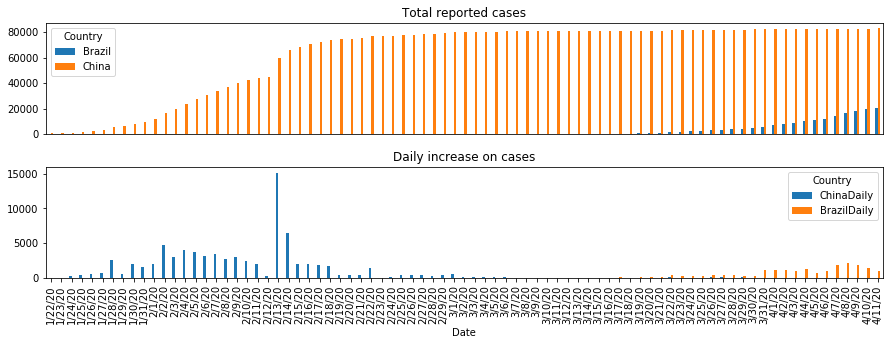

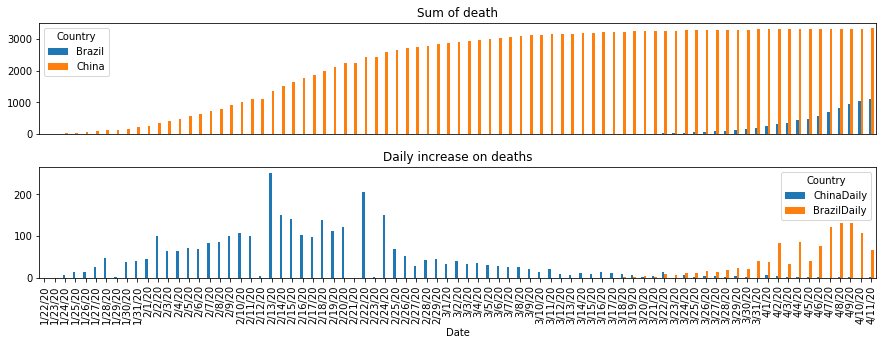

In [308]:
plot()

In [309]:
report()

Country,Brazil,China,ChinaDaily,BrazilDaily
,,,,
Reported cases/报告病例总数,20727.00,83014.00,73.00,1089.00
Reported Deaths/报告死亡总数,1124.00,3343.00,3.00,67.00
Mortality rate/死亡率 %,5.42,4.03,4.11,6.15


In [194]:
col1 = c =[i for i in sick.columns if 'Daily' in i]
col2 = c =[i for i in sick.columns if 'Daily' not in i]
    
"""sick[col2].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');
sick[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');
dead[col2].plot(kind='bar', figsize = (15,3), title = 'Sum of death');
dead[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');"""

"sick[col2].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');\nsick[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');\ndead[col2].plot(kind='bar', figsize = (15,3), title = 'Sum of death');\ndead[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');"

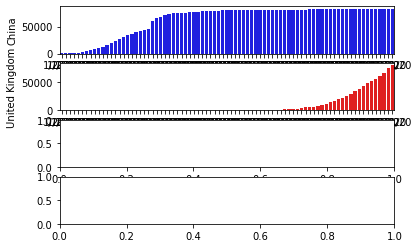

In [223]:
fig,ax = plt.subplots(4,1)

ax[0] = sns.barplot(x=sick.index,y='China', data = sick, color = 'blue', ax = ax[0])
ax[1] = sns.barplot(x=sick.index,y=sick['United Kingdom'], color ='red', ax = ax[1])

plt.tightlayout()
plt.show()

In [304]:
def plot():
    col1 = c =[i for i in sick.columns if 'Daily' in i]
    col2 = c =[i for i in sick.columns if 'Daily' not in i]
    fig = plt.figure(figsize = (15,10))
    fig.subplots_adjust(hspace=.3, wspace=.4, left=None, bottom=None, right=None, top=None)
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    
    sick[col2].plot(kind ='bar', title = 'Total reported cases', ax = ax1)
    sick[col1].plot(kind ='bar', title = 'Daily increase on cases', ax = ax2)
    
    ax1.set_xticks([])
    ax1.set_xlabel('')
    
    plt.show()
    
    fig = plt.figure(figsize = (15,10))
    fig.subplots_adjust(hspace=.3, wspace=.4, left=None, bottom=None, right=None, top=None)
    ax3 = fig.add_subplot(4,1,3)
    ax4 = fig.add_subplot(4,1,4)
    dead[col2].plot(kind ='bar', title = 'Sum of death', ax = ax3)
    dead[col1].plot(kind ='bar', title = 'Daily increase on deaths', ax = ax4)
   
    
    ax3.set_xticks([])
    ax3.set_xlabel('')
    #plt.tight_layout()
    plt.show()

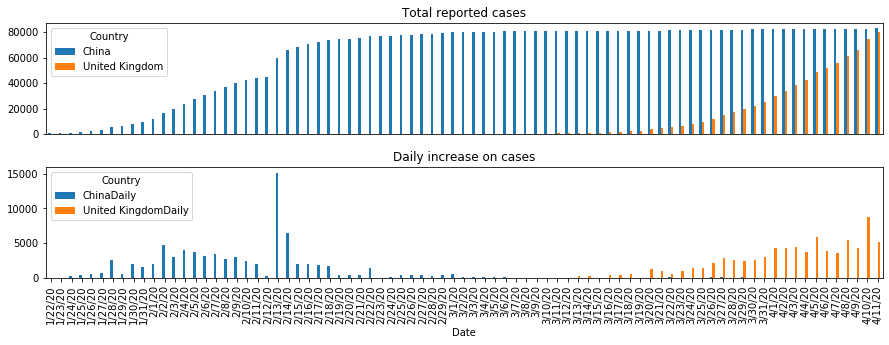

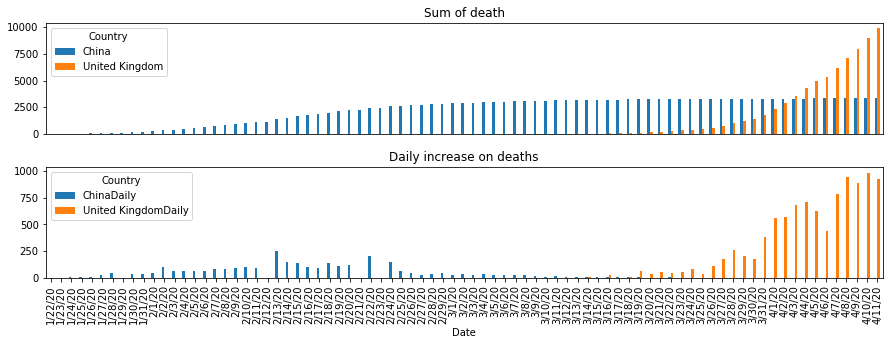

In [305]:
plot()